In [14]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict,Annotated,Literal
from IPython.display import Image

In [ ]:
class BMIState(TypedDict):
    weight:Annotated[float,"Weight of the person"]
    height:Annotated[float,"Height of the person"]
    bmi:Annotated[float,"BMI of the person"]
    personality:Annotated[Literal["underweight","normal","overweight","obese"],"category of the person according to the bmi"]
    

In [7]:
def bmi_calc(state:BMIState)->BMIState:
    weight=state['weight']
    height=state['height']
    ans=weight/(height*height)
    state['bmi']=round(ans,2)
    return state

In [17]:
def bmi_categorizer(state:BMIState)->BMIState:
    bmi=state['bmi']
    if bmi < 18.5:
        state['personality']='underweight'
    elif bmi < 24.9:
        state['personality']='normal weight'
    elif bmi < 29.9:
        state['personality']='overweight'
    else:
        state['personality']='obese'
    return state

In [19]:
graph=StateGraph(BMIState)
graph.add_node('bmi_calculator',bmi_calc)
graph.add_node('bmi_categorizer',bmi_categorizer)
graph.add_edge(START,'bmi_calculator')
graph.add_edge('bmi_calculator','bmi_categorizer')
graph.add_edge('bmi_categorizer',END)
workflow=graph.compile()

In [20]:
output_state=workflow.invoke({'weight':80,'height':1.73})
output_state

{'weight': 80, 'height': 1.73, 'bmi': 26.73, 'personality': 'overweight'}

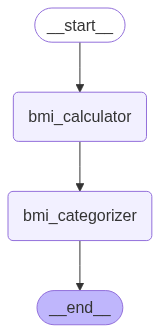

In [21]:
Image(workflow.get_graph().draw_mermaid_png())